In [2]:
import infomap

In [4]:
from infomap import Infomap
im=Infomap()
im.read_file('g.txt')

Parsing undirected network from file 'g.txt'...
  Parsing links...
  -> 4 links
Done!
-------------------------------------
  -> 4 nodes
  -> 4 links with total weight 1.8


In [10]:
im.run()
di=im.getModules(states=True)

  Infomap v2.8.0 starts at 2025-01-23 11:46:17
  -> Input network: 
  -> No file output!
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 4 nodes and 4 links...
  -> One-level codelength: 1.88771766

Trial 1/1 starting at 2025-01-23 11:46:17
Two-level compression: -3.1e-13% 
Partitioned to codelength 2.77555756e-15 + 1.88771766 = 1.887717664 in 1 (0 non-trivial) modules.

=> Trial 1/1 finished in 0.0001105s with codelength 1.88771766


Summary after 1 trial
Best end modular solution in 2 levels (warning: worse than one-level solution):
Per level number of modules:         [          1,           0] (sum: 1)
Per level number of leaf nodes:      [          0,           4] (sum: 4)
Per level average child degree:      [          1,           4] (average: 3.4)
Per level codelength for modules:    

In [17]:
for link in im.get_links(data='weight'):
    print(link[0])


0
0
0
1


In [2]:
import load_graph
import importlib
importlib.reload(load_graph)
import load_graph
import Expected_mod as ex 


In [5]:
# go through dic choose file automatically

import os
import networkx as nx
import time
from Expected_mod import Trans_C1
from infomap import Infomap
path='mcp_acp_data//k10_l10//'
filelist=[i for i in os.listdir(path) if (i[-3:]=='txt' and i[10]=='1' and i[11]=='0' and i[12]=='_' )]
filelist.sort()
filelist

# run weighted louvain, save clustering
k=10
l=10
value=[]
T=[]
clustering=[]
#path='datasets//'

for graph in filelist:
    im=Infomap()
    im.read_file(path+graph)
    im.run()
    #g=load_graph.read_g(path+graph)
    edge=[]
    p=[]
    for link in im.get_links(data='weight'):
        edge.append((link[0],link[1]))
        p.append(link[2])
    t1=time.time()
    cluster=im.getModules(states=True)

    cluster=[i for i in cluster.values()]
    t2=time.time()
    print('******',graph)
    print(graph,'--','cluster:',cluster)
    # repeat three times
    clustering.append(cluster)

    Emod=ex.APWP(edge,p,Trans_C1(cluster))
    

    print('----------graph: ',graph,'----------')
    #print('cluster:',cluster)
    print('Ex modularity',Emod)
    value.append(Emod)
    T.append(t2-t1)
    




# run ex mod, save time and value



Parsing undirected network from file 'mcp_acp_data//k10_l10//evolving_k10_l10_p0.00.txt'...
  Parsing links...
****** evolving_k10_l10_p0.00.txt
evolving_k10_l10_p0.00.txt -- cluster: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
  -> 450 links
Done!
-------------------------------------
  -> 100 nodes
  -> 450 links with total weight 223.828919
  Infomap v2.8.0 starts at 2025-06-17 11:45:33
  -> Input network: 
  -> No file output!
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 100 nodes and 450 links...
  -> One-level codelength:

In [6]:
print(value)
print(Trans_C1(clustering))

[0.8982831724997824, 0.47278579300908286, 0.8063409706091433, 0.7427219485024434, 0.7043621789774661, 0.6593177501911391, 0.6056131865325529, 0.5609741264847079, 0.5114697984520538, 0.46052553187866563, 0.3745395651594999, 0.389481185501853, 0.33435806966987647, 0.34176816234988916, 0.3661963347532981, 0.3414172419670701, 0.3415372771117402, 0.35256421573195196, 0.3492322649100947, 0.3538199867684351, 0.34350354866522226]
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20]]


In [4]:
print(value)

[0.8982831724997824, 0.8524725948617204, 0.7875005218347632, 0.7475430661498664, 0.6887659261043407, 0.639675590509267, 0.5978830745377571, 0.5413392674893291, 0.48377625606748925, 0.4577706668262515, 0.40162230503104873, 0.37025561775248067, 0.3672609322961575, 0.3424718844353524, 0.3590214183145355, 0.0, 0.0, 0.35462884590727745, 0.3487326379714266, 0.34604712679778893, 0.3482417383979575]


[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1] 21
[0.8982831724997824, 0.8524725948617204, 0.7875005218347632, 0.7475430661498664, 0.6887659261043407, 0.639675590509267, 0.5978830745377571, 0.5413392674893291, 0.48377625606748925, 0.4577706668262515, 0.40162230503104873, 0.37025561775248067, 0.3672609322961575, 0.3424718844353524, 0.3590214183145355, 0.0, 0.0, 0.35462884590727745, 0.3487326379714266, 0.34604712679778893, 0.3482417383979575] 21


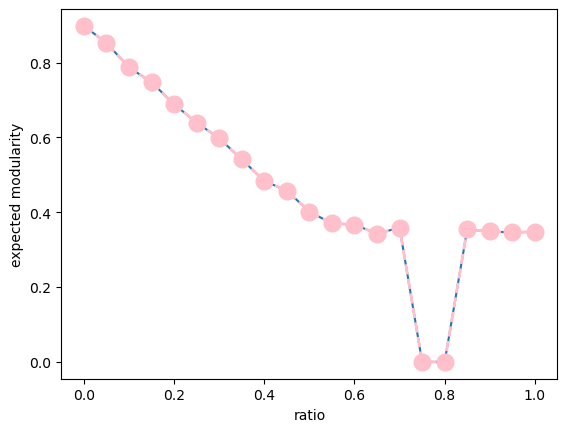

In [ ]:
#first time running
import matplotlib.pyplot as plt
list_=[1,0.95,0.9,0.85,0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.1,0.05,0]
list_.reverse()
print(list_,len(list_))
print(value,len(value))
#list_.reverse()
plt.plot(list_,value)
plt.plot(list_, value, color='pink', marker='o', linestyle='dashed',
     linewidth=2, markersize=12)
plt.xlabel('ratio')
plt.ylabel('expected modularity')
#plt.savefig('fig//ex_mod_ratio_infomap.pdf')

why collapse to 0 when ratio = 0.75 and 0.8

In [ ]:
import os
import networkx as nx
import time
from Expected_mod import Trans_C1
from infomap import Infomap
path='mcp_acp_data//k10_l10//'
filelist=[i for i in os.listdir(path) if (i[-3:]=='txt' and i[10]=='1' and i[11]=='0' and i[12]=='_' )]
filelist.sort()
path1, path2=filelist[-6:-4]
g1=load_graph.read_g(path+path1)

g2=load_graph.read_g(path+path2)


['evolving_k10_l10_p0.75.txt', 'evolving_k10_l10_p0.8.txt']

In [25]:
for _ in clustering:
    print(_)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10, 10, 10, 10, 

In [23]:
from Expected_mod import Trans_C2
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi

node=100
nomalized_cluster=Trans_C2(Trans_C1(clustering[0]),node)

print('n',nomalized_cluster)
NMI=[]
for c in clustering:
    c=Trans_C2(Trans_C1(c),node)
    
    score=nmi(nomalized_cluster,list(c))
    
    NMI.append(float(score))
print(NMI)

n [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 9. 9. 9. 9. 9. 9.
 9. 9. 9. 9.]
[1.0, 1.0, 1.0, 1.0, 0.9689626841273452, 1.0, 0.9856611963991714, 0.8954132033012195, 0.8261019064717691, 0.8274232463852808, 0.6140715419787096, 0.5548482065498326, 0.40433048788731973, 0.3595820361033658, 0.39308749717085856, 0.0, 0.0, 0.24838518622240338, 0.20896218095570618, 0.18911216553468868, 0.15380211460950044]


In [6]:
print(list(clustering[0]))

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


AMI

In [5]:
from Expected_mod import Trans_C2
from sklearn.metrics.cluster import adjusted_mutual_info_score as ami 
node=100
nomalized_cluster=Trans_C2(Trans_C1(clustering[0]),node)

print('n',nomalized_cluster)
AMI=[]
for c in clustering:
    c=Trans_C2(Trans_C1(c),node)
    
    score=ami(nomalized_cluster,list(c))
    
    AMI.append(float(score))
print(AMI)

n [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 9. 9. 9. 9. 9. 9.
 9. 9. 9. 9.]
[1.0, 1.0, 1.0, 1.0, 0.9613324313645352, 1.0, 0.981710906546789, 0.8697434392290316, 0.783466055630396, 0.7800839015672726, 0.5197887503488567, 0.43317602631833924, 0.26173363573863456, 0.1879633451873207, 0.19789242877080077, 0.0, 0.0, 0.06797704442506829, -0.00195434456047094, -0.005261505499186138, -0.0511379762056503]


In [31]:
from Expected_mod import Trans_C1, APWP
import Expected_mod as ex 
import load_graph
import importlib
import time
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 

importlib.reload(load_graph)
filelist1=[i for i in os.listdir('datasets') if i[-3:]=='txt' and i[-12:]=='l10_p0.7.txt' ]
filelist1.sort()

NMI=[]
X_=[]
l=10
path='datasets//'
for graph in filelist1:
   
    im=Infomap()
    im.read_file(path+graph)
    im.run()
    cluster=im.getModules(states=True)

    cluster=[i for i in cluster.values()]
    
    strr=[]
    flag=0
   
    for _ in graph:
        if _=='k':
            
            flag=1
            continue
        if flag==0:
            continue
        if _<'0' or _>'9':
           
            break
        strr.append(_)
    
    k=sum([int(strr[i])*(10**(len(strr)-(i+1))) for i in range(len(strr))])
    c=[i for i in range(k*l)]
    
    stad_cluster=[c[x:x+l] for x in range(0, len(c), l)]
    nmi_=nmi(Trans_C2(stad_cluster,k*l),cluster)
    NMI.append(nmi_)
    X_.append(k)

Parsing undirected network from file 'datasets//evolving_k100_l10_p0.7.txt'...
  Parsing links...
  -> 4500 links
Done!
-------------------------------------
  -> 1000 nodes
  -> 4500 links with total weight 2213.73979
  Infomap v2.8.0 starts at 2025-01-23 13:29:02
  -> Input network: 
  -> No file output!
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 1000 nodes and 4500 links...
  -> One-level codelength: 9.89166523

Trial 1/1 starting at 2025-01-23 13:29:02
Two-level compression: 9.8% 0.47% 
Partitioned to codelength 4.10310098 + 4.77265043 = 8.87575141 in 108 modules.
Super-level compression: to codelength 8.87575141 in 108 top modules.

Recursive sub-structure compression: 0% . Found 2 levels with codelength 8.87575141

=> Trial 1/1 finished in 0.043456417s with codelength 8.87575141




In [32]:
print(NMI)
print(X_)


[0.6473189682088732, 0.3930874971708585, 0.39889974659857774, 0.3845156990832956, 0.4581920933971949, 0.46940489600524143, 0.4359443866378008, 0.48254082907622836, 0.4427387442936128, 0.4506131761550871, 0.4342510526403001, 1.0, 0.4398012940574545, 0.5039344201584237, 0.463442550520324, 0.5325506427590084, 0.47323692515899807, 0.5289152295930498, 0.5156276860943385, 0.50936365132087, 0.5362781208492536, 0.5014165241453404, 1.2813706015259676e-15, 0.5279515014369605, 0.517071475190088, 0.5300317450117258, 0.5657396666454579, 0.5765230085255141, 0.5535910778651987, 0.5440447859556953, 0.5472226602971116, 0.580826893653916, 0.5885833617327666, 0.0, 0.5952311391104587, 0.5921851879632641, 0.585961721917058, 0.5672023073571515, 0.5687627135057451, 0.5713441566580897, 0.58785530873232, 0.5609973824660842, 0.5778474216621091, 0.5805029031850706, 0.0, 0.58009120463149, 0.5944694898894733, 0.5953430235333429, 0.6103480782704465, 0.5831635495144356, 0.5922315468507915, 0.6119774293686991, 0.5997

### evolving p0.3 l10

In [10]:
from Expected_mod import Trans_C1, APWP
import Expected_mod as ex 
import load_graph
import importlib
import time
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
from Expected_mod import Trans_C2
from sklearn.metrics.cluster import adjusted_mutual_info_score as ami 

importlib.reload(load_graph)
path2='//Users//xinsh758//documents//academic//evaluation//Evaluation//mcp_acp_data//l10_p0.3//datasets//'

filelist1=[i for i in os.listdir(path2) if i[-3:]=='txt'  ]
filelist1.sort()
print(filelist1)

NMI=[]
X_=[]
l=10
path='mcp_acp_data//l10_p0.3//datasets//'
for graph in filelist1:
   
    im=Infomap()
    im.read_file(path+graph)
    im.run()
    cluster=im.getModules(states=True)

    cluster=[i for i in cluster.values()]
    
    strr=[]
    flag=0
   
    for _ in graph:
        if _=='k':
            
            flag=1
            continue
        if flag==0:
            continue
        if _<'0' or _>'9':
           
            break
        strr.append(_)
    
    k=sum([int(strr[i])*(10**(len(strr)-(i+1))) for i in range(len(strr))])
    c=[i for i in range(k*l)]
    
    stad_cluster=[c[x:x+l] for x in range(0, len(c), l)]
    nmi_=ami(Trans_C2(stad_cluster,k*l),cluster)
    NMI.append(nmi_)
    X_.append(k)

['evolving_P_scalability_k100_l10.txt', 'evolving_P_scalability_k10_l10.txt', 'evolving_P_scalability_k11_l10.txt', 'evolving_P_scalability_k12_l10.txt', 'evolving_P_scalability_k13_l10.txt', 'evolving_P_scalability_k14_l10.txt', 'evolving_P_scalability_k15_l10.txt', 'evolving_P_scalability_k16_l10.txt', 'evolving_P_scalability_k17_l10.txt', 'evolving_P_scalability_k18_l10.txt', 'evolving_P_scalability_k19_l10.txt', 'evolving_P_scalability_k20_l10.txt', 'evolving_P_scalability_k21_l10.txt', 'evolving_P_scalability_k22_l10.txt', 'evolving_P_scalability_k23_l10.txt', 'evolving_P_scalability_k24_l10.txt', 'evolving_P_scalability_k25_l10.txt', 'evolving_P_scalability_k26_l10.txt', 'evolving_P_scalability_k27_l10.txt', 'evolving_P_scalability_k28_l10.txt', 'evolving_P_scalability_k29_l10.txt', 'evolving_P_scalability_k2_l10.txt', 'evolving_P_scalability_k30_l10.txt', 'evolving_P_scalability_k31_l10.txt', 'evolving_P_scalability_k32_l10.txt', 'evolving_P_scalability_k33_l10.txt', 'evolving_P

In [11]:
print(NMI)
print(X_)


[0.9828551034442202, 0.9817109065467888, 0.9837372308131118, 0.9853647792153978, 0.9733975077183841, 0.9622750591506055, 0.9887573852841746, 0.9688730454269379, 1.0, 0.9908812912932173, 0.9660951217735423, 0.9872322239315628, 0.976350262676671, 0.956108744589477, 0.979212056161898, 0.9801660596352421, 0.9936786874146808, 0.9620907608827814, 0.9878615369338072, 0.9889139509391207, 1.0, 4.5523428636541376e-30, 0.9891730586285139, 0.9635457807106694, 0.9802821492714937, 0.9622703818751925, 1.0, 0.977394364541278, 0.9914196446831255, 0.9872349198516216, 0.9755303239068696, 0.9840354863190528, 0.7828069258902589, 1.0, 0.9849215743558773, 0.9870633641450706, 0.9820898169845459, 0.9862265602870195, 0.9896219636030492, 0.9967140214107763, 0.993575279293574, 0.9809710486933522, 0.9746971860454884, 0.8691732217631793, 0.9850380529253956, 0.9953507535362788, 0.9884879450745003, 0.9768007846412381, 0.9861149190490074, 0.9728519936094749, 0.9809010838051092, 0.9787577864858696, 0.9663746415789529, 

# Experiment low prob

In [3]:
# go through dic choose file automatically

import os
import importlib
import time

import Expected_mod as ex 
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
import load_graph
from Expected_mod import Trans_C1
importlib.reload(load_graph)
import load_graph
import os
from tkinter import Tcl
import networkx
from infomap import Infomap
    
path2='//Users//xinsh758//Documents//academic//evaluation//Evaluation//datasets//l10_p0.3_evolving_lowP1//'
filelists=[i for i in os.listdir(path2)]
filelists=Tcl().call('lsort','-dict',filelists)

# run weighted louvain, save clustering

Info={}

for file in filelists:
    if file[-4:] =='.txt':
        file_list=file.split('_')
       
        k=[i for i in file_list if i[0]=='k'][0][1:]
        l=[i for i in file_list if i[0]=='l'][0][1:]

        im=Infomap()
        im.read_file(path2+file)
        im.run()
        cluster=im.getModules(states=True)

        cluster=[i for i in cluster.values()]
        cluster=Trans_C1(cluster)
       
        Info.update({k:cluster})



# run ex mod, save time and value



Parsing undirected network from file '//Users//xinsh758//Documents//academic//evaluation//Evaluation//datasets//l10_p0.3_evolving_lowP1//k2_l10_p0.3.txt'...
  Parsing links...
  -> 90 links
Done!
-------------------------------------
  -> 20 nodes
  -> 90 links with total weight 4.66169084
  Infomap v2.8.0 starts at 2025-04-07 09:49:01
  -> Input network: 
  -> No file output!
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 20 nodes and 90 links...
  -> One-level codelength: 4.25810393

Trial 1/1 starting at 2025-04-07 09:49:01
Two-level compression: -1.9e-13% 
Partitioned to codelength 4.78076224e-15 + 4.25810393 = 4.25810393 in 1 (0 non-trivial) modules.

=> Trial 1/1 finished in 0.000126584s with codelength 4.25810393


Summary after 1 trial
Best end modular solution in 2 levels (warning: 

In [4]:
Info

{'2': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]],
 '3': [[0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29]],
 '4': [[0, 2, 3, 4, 5, 6, 7, 8, 9, 29],
  [1, 10, 20, 21, 22, 23, 24, 25, 26, 27, 28],
  [11, 12, 13, 14, 15, 16, 17, 18, 19],
  [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]],
 '5': [[0, 1, 3, 4, 5, 6, 7, 8, 9],
  [2, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
  [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 31],
  [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
  [30, 32, 33, 34, 35, 36, 37, 38, 39]],
 '6': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
  [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
  [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
  [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
  [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
  [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]],
 '7': [[0, 1, 2, 3, 4, 6, 7, 8, 9],
  [5, 27, 40, 41, 42, 43, 44,

## saving results

In [5]:

import json
path='mcp_acp_data//l10_p0.3_evolving_lowP1//result//Infomap//'
with open(path+'infomap_increaseK_lowP.json','w') as fp:
          json.dump(Info,fp,indent=4) # With indent=4 (pretty format)

In [6]:
with open(path+'infomap_increaseK_lowP.json','r') as fp:
    data=json.load(fp)
print(data)

{'2': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]], '3': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]], '4': [[0, 2, 3, 4, 5, 6, 7, 8, 9, 29], [1, 10, 20, 21, 22, 23, 24, 25, 26, 27, 28], [11, 12, 13, 14, 15, 16, 17, 18, 19], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]], '5': [[0, 1, 3, 4, 5, 6, 7, 8, 9], [2, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 31], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [30, 32, 33, 34, 35, 36, 37, 38, 39]], '6': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]], '7': [[0, 1, 2, 3, 4, 6, 7, 8, 9], [5, 27, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 28, 29], [30, 31, 32, 33,

# Experiment 3 high prob. from 0.9 to 1

## have completely same graph structures with low prob.

In [1]:
# go through dic choose file automatically

import os
import importlib
import time

import Expected_mod as ex 
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
import load_graph
from Expected_mod import Trans_C1
importlib.reload(load_graph)
import load_graph
import os
from tkinter import Tcl
import networkx
from infomap import Infomap
    
path2='//Users//xinsh758//Documents//academic//evaluation//Evaluation//datasets//l10_p0.3_evolving_highP1//'
filelists=[i for i in os.listdir(path2)]
filelists=Tcl().call('lsort','-dict',filelists)

# run weighted louvain, save clustering

Info={}

for file in filelists:
    if file[-4:] =='.txt':
        file_list=file.split('_')
       
        k=[i for i in file_list if i[0]=='k'][0][1:]
        l=[i for i in file_list if i[0]=='l'][0][1:]

        im=Infomap()
        im.read_file(path2+file)
        im.run()
        cluster=im.getModules(states=True)

        cluster=[i for i in cluster.values()]
        cluster=Trans_C1(cluster)
       
        Info.update({k:cluster})



# run ex mod, save time and value



Parsing undirected network from file '//Users//xinsh758//Documents//academic//evaluation//Evaluation//datasets//l10_p0.3_evolving_highP1//k2_l10_p0.3.txt'...
  Parsing links...
  -> 90 links
Done!
-------------------------------------
  -> 20 nodes
  -> 90 links with total weight 85.0894249
  Infomap v2.8.0 starts at 2025-04-07 14:29:16
  -> Input network: 
  -> No file output!
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 20 nodes and 90 links...
  -> One-level codelength: 4.30322937

Trial 1/1 starting at 2025-04-07 14:29:16
Two-level compression: 0% 
Partitioned to codelength 0 + 4.30322937 = 4.303229371 in 1 (0 non-trivial) modules.

=> Trial 1/1 finished in 0.000112875s with codelength 4.30322937


Summary after 1 trial
Best end modular solution in 2 levels:
Per level number of modules

In [2]:

import json
path='mcp_acp_data//l10_p0.3_evolving_highP1//result//Infomap//'
with open(path+'infomap_increaseK_highP.json','w') as fp:
          json.dump(Info,fp,indent=4) # With indent=4 (pretty format)

# Experiment polarized graphs

In [1]:
# go through dic choose file automatically

import os
import importlib
import time

import Expected_mod as ex 
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
import load_graph
from Expected_mod import Trans_C1
importlib.reload(load_graph)
import load_graph
import os
from tkinter import Tcl
import networkx
from infomap import Infomap
    
path2='//Users//xinsh758//Documents//academic//evaluation//Evaluation//datasets//l50_k2_p0.18_polarized_graph//'
filelists=[i for i in os.listdir(path2)]
filelists=Tcl().call('lsort','-dict',filelists)

# run weighted louvain, save clustering

Info={}

for file in filelists:
    if file[-4:] =='.txt':
        file_list=file.split('_')
       
        k=[i for i in file_list if i[0]=='k'][0][1:]
        l=[i for i in file_list if i[0]=='l'][0][1:]
        name=file_list[-2]

        im=Infomap()
        im.read_file(path2+file)
        im.run()
        cluster=im.getModules(states=True)

        cluster=[i for i in cluster.values()]
        cluster=Trans_C1(cluster)
       
        Info.update({name:cluster})



# run ex mod, save time and value



Parsing undirected network from file '//Users//xinsh758//Documents//academic//evaluation//Evaluation//datasets//l50_k2_p0.18_polarized_graph//l50_k2_p0.18_polarized_ordered_graph.txt'...
  Parsing links...
  -> 2450 links
Done!
-------------------------------------
  -> 100 nodes
  -> 2450 links with total weight 1225.09221
  Infomap v2.8.0 starts at 2025-04-09 14:55:06
  -> Input network: 
  -> No file output!
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 100 nodes and 2450 links...
  -> One-level codelength: 6.19914693

Trial 1/1 starting at 2025-04-09 14:55:06
Two-level compression: 1.4e-14% 
Partitioned to codelength -4.4408921e-16 + 6.19914693 = 6.199146927 in 1 (0 non-trivial) modules.

=> Trial 1/1 finished in 0.000507541s with codelength 6.19914693


Summary after 1 trial
Best end m

In [2]:
Info

{'ordered': [[0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99]],
 'unordered': [[0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,


## saving results

In [2]:

import json
path='mcp_acp_data//l50_k2_p0.18_polarized_graph//result//Infomap//'
with open(path+'infomap_polarized.json','w') as fp:
          json.dump(Info,fp,indent=4) # With indent=4 (pretty format)

# real datasets

## krogan2006_extended

In [1]:
# krogan2006_core

import os
import importlib
import time

import Expected_mod as ex 
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
import load_graph
from Expected_mod import Trans_C1
importlib.reload(load_graph)
import load_graph
import os
from tkinter import Tcl
import networkx
from infomap import Infomap

Info={}
    
path2='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//krogan2006_core//krogan2006_core_new_version.txt'
im=Infomap()
im.read_file(path2)
im.run()
cluster=im.getModules(states=True)
k=len(cluster)

cluster=[i for i in cluster.values()]
cluster=Trans_C1(cluster)

Info.update({k:cluster})


Parsing undirected network from file '//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//krogan2006_core//krogan2006_core_new_version.txt'...
  Parsing links...
  -> 7123 links
Done!
-------------------------------------
  -> 2708 nodes
  -> 7123 links with total weight 4842.04
  Infomap v2.8.0 starts at 2025-04-23 16:58:09
  -> Input network: 
  -> No file output!
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 2708 nodes and 7123 links...
  -> One-level codelength: 10.4425878

Trial 1/1 starting at 2025-04-23 16:58:09
Two-level compression: 38% 0.48% 0.042642647% 0.00861308506% 0.0459968458% 0.0068282096% 
Partitioned to codelength 1.85771919 + 4.62817029 = 6.485889478 in 313 modules.
Super-level compression: to codelength 6.485889478 in 313 top modules.

Recursiv

In [2]:
import json
path='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//krogan2006_core//Infomap_results//'
with open(path+'infomap.json','w') as fp:
          json.dump(Info,fp,indent=4) # With indent=4 (pretty format)

## krogan2006_extended

In [3]:


import os
import importlib
import time

import Expected_mod as ex 
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
import load_graph
from Expected_mod import Trans_C1
importlib.reload(load_graph)
import load_graph
import os
from tkinter import Tcl
import networkx
from infomap import Infomap

Info={}
    
path2='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//krogan2006_extended//krogan2006_extended_new_version.txt'
im=Infomap()
im.read_file(path2)
im.run()
cluster=im.getModules(states=True)
k=len(cluster)

cluster=[i for i in cluster.values()]
cluster=Trans_C1(cluster)

Info.update({k:cluster})


Parsing undirected network from file '//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//krogan2006_extended//krogan2006_extended_new_version.txt'...
  Parsing links...
  -> 14317 links
Done!
-------------------------------------
  -> 3672 nodes
  -> 14317 links with total weight 5949.005
  Infomap v2.8.0 starts at 2025-04-24 10:53:41
  -> Input network: 
  -> No file output!
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 3672 nodes and 14317 links...
  -> One-level codelength: 10.6278393

Trial 1/1 starting at 2025-04-24 10:53:41
Two-level compression: 30% 0.5% 0.0472595276% 0.171064593% 
Partitioned to codelength 2.41665353 + 5.00013699 = 7.416790514 in 326 modules.
Super-level compression: to codelength 7.416790514 in 326 top modules.

Recursive sub-structure co

In [4]:
import json
path='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//krogan2006_extended//Infomap_results//'
with open(path+'infomap.json','w') as fp:
          json.dump(Info,fp,indent=4) # With indent=4 (pretty format)

## TAP

In [5]:


import os
import importlib
import time

import Expected_mod as ex 
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
import load_graph
from Expected_mod import Trans_C1
importlib.reload(load_graph)
import load_graph
import os
from tkinter import Tcl
import networkx
from infomap import Infomap

Info={}
    
path2='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//TAP//TAP_core_new_version.txt'
im=Infomap()
im.read_file(path2)
im.run()
cluster=im.getModules(states=True)
k=len(cluster)

cluster=[i for i in cluster.values()]
cluster=Trans_C1(cluster)

Info.update({k:cluster})


Parsing undirected network from file '//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//TAP//TAP_core_new_version.txt'...
  Parsing links...
  -> 7123 links
Done!
-------------------------------------
  -> 2708 nodes
  -> 7123 links with total weight 4839.011
  Infomap v2.8.0 starts at 2025-04-24 12:11:04
  -> Input network: 
  -> No file output!
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 2708 nodes and 7123 links...
  -> One-level codelength: 10.442892

Trial 1/1 starting at 2025-04-24 12:11:05
Two-level compression: 37% 0.74% 0.00940987425% 0.0296728422% 0.00472455869% 
Partitioned to codelength 1.84253267 + 4.64481637 = 6.487349033 in 316 modules.
Super-level compression: 0.101846869% to codelength 6.480741871 in 66 top modules.

Recursive sub-structure com

In [6]:
import json
path='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//TAP//Infomap_results//'
with open(path+'infomap.json','w') as fp:
          json.dump(Info,fp,indent=4) # With indent=4 (pretty format)

# krogan2006_core & mips

In [6]:


import os
import importlib
import time

import Expected_mod as ex 
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
import load_graph
from Expected_mod import Trans_C1
importlib.reload(load_graph)
import load_graph
import os
from tkinter import Tcl
import networkx
from infomap import Infomap

Info={}
    
path2='mcp_acp_data//krogan2006_core//intersec_mips//net//krogan2006_core_mips_net.txt'
im=Infomap()
im.read_file(path2)
im.run()
cluster=im.getModules(states=True)
k=len(cluster)

cluster=[i for i in cluster.values()]
cluster=Trans_C1(cluster)

Info.update({k:cluster})


Parsing undirected network from file 'mcp_acp_data//krogan2006_core//intersec_mips//net//krogan2006_core_mips_net.txt'...
  Parsing links...
  -> 1797 links
Done!
-------------------------------------
  -> 679 nodes
  -> 1797 links with total weight 1422.53
  Infomap v2.8.0 starts at 2025-05-14 13:43:36
  -> Input network: 
  -> No file output!
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 679 nodes and 1797 links...
  -> One-level codelength: 8.79311575

Trial 1/1 starting at 2025-05-14 13:43:36
Two-level compression: 49% 0.32% 
Partitioned to codelength 0.464294717 + 4.02612372 = 4.490418438 in 92 modules.
Super-level compression: 0.918434978% to codelength 4.449176865 in 39 top modules.

Recursive sub-structure compression: 23.7801855% 2.48271993% 0% . Found 4 levels with codelength 4.41

In [7]:
import json
path='mcp_acp_data//krogan2006_core//intersec_mips//Infomap_results//'
with open(path+'infomap.json','w') as fp:
          json.dump(Info,fp,indent=4) # With indent=4 (pretty format)

# krogan2006_extended & mips

In [4]:


import os
import importlib
import time

import Expected_mod as ex 
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
import load_graph
from Expected_mod import Trans_C1
importlib.reload(load_graph)
import load_graph
import os
from tkinter import Tcl
import networkx
from infomap import Infomap

Info={}
    
path2='mcp_acp_data//krogan2006_extended//intersec_mips//krogan2006_extented_mips_net.txt'
im=Infomap()
im.read_file(path2)
im.run()
cluster=im.getModules(states=True)
k=len(cluster)

cluster=[i for i in cluster.values()]
cluster=Trans_C1(cluster)

Info.update({k:cluster})


Parsing undirected network from file 'mcp_acp_data//krogan2006_extended//intersec_mips//krogan2006_extented_mips_net.txt'...
  Parsing links...
  -> 2639 links
Done!
-------------------------------------
  -> 794 nodes
  -> 2639 links with total weight 1554.62
  Infomap v2.8.0 starts at 2025-05-05 22:02:21
  -> Input network: 
  -> No file output!
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 794 nodes and 2639 links...
  -> One-level codelength: 8.88150636

Trial 1/1 starting at 2025-05-05 22:02:21
Two-level compression: 45% 0.14% 
Partitioned to codelength 0.709879488 + 4.19876067 = 4.908640163 in 93 modules.
Super-level compression: 0.111088472% to codelength 4.90318723 in 16 top modules.

Recursive sub-structure compression: 39.0830281% 0.284942888% 0% . Found 4 levels with codelength 4

In [5]:
import json
path='mcp_acp_data//krogan2006_extended//intersec_mips//Infomap_results//'
with open(path+'infomap.json','w') as fp:
          json.dump(Info,fp,indent=4) # With indent=4 (pretty format)

### l10_k10_p0.4_multiplied

In [9]:
# go through dic choose file automatically

import os
import importlib
import time

import Expected_mod as ex 
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
import load_graph
from Expected_mod import Trans_C1
importlib.reload(load_graph)
import load_graph
import os
from tkinter import Tcl
import networkx
from infomap import Infomap
    
path2='mcp_acp_data//l10_k10_p0.4_multiplied//new//datasets//'
filelists=[i for i in os.listdir(path2)]
filelists=Tcl().call('lsort','-dict',filelists)
print(filelists)
# run weighted louvain, save clustering

Info={}

for file in filelists:
    if file[-4:] =='.txt':
        file_list=file.split('_')
        strr=[]
        flag=0
    
        for _ in file:
            if _=='i':
                
                flag=1
                continue
            if flag==0:
                continue
            if _<'0' or _>'9':
            
                break
            strr.append(_)

        multi=str(0)+'.'+str(strr[1])#sum([int(strr[i])*(10**(len(strr)-(i+1))) for i in range(len(strr))])
        print(file)
        print('m',multi)
        
        im=Infomap()
        im.read_file(path2+file)
        im.run()
        cluster=im.getModules(states=True)

        cluster=[i for i in cluster.values()]
        cluster=Trans_C1(cluster)
       
        Info.update({multi:cluster})

('k10_l10_p0.4_multi00.txt', 'k10_l10_p0.4_multi01.txt', 'k10_l10_p0.4_multi02.txt', 'k10_l10_p0.4_multi03.txt', 'k10_l10_p0.4_multi04.txt', 'k10_l10_p0.4_multi05.txt')
k10_l10_p0.4_multi00.txt
m 0.0
Parsing undirected network from file 'mcp_acp_data//l10_k10_p0.4_multiplied//new//datasets//k10_l10_p0.4_multi00.txt'...
  Parsing links...
  -> 450 links
Done!
-------------------------------------
  -> 100 nodes
  -> 450 links with total weight 111.70318
  Infomap v2.8.0 starts at 2025-06-10 17:11:10
  -> Input network: 
  -> No file output!
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 100 nodes and 450 links...
  -> One-level codelength: 6.59775174

Trial 1/1 starting at 2025-06-10 17:11:10
Two-level compression: 7.6% 4.5% 
Partitioned to codelength 1.43449613 + 4.3845976 = 5.819093724 in 1

In [10]:
import json
path='mcp_acp_data//l10_k10_p0.4_multiplied//new//Infomap_results//'
with open(path+'infomap.json','w') as fp:
          json.dump(Info,fp,indent=4) # With indent=4 (pretty format)

In [11]:
with open(path+'infomap.json','r') as fp:
    data=json.load(fp)
print(data)

{'0.0': [[0, 1, 2, 3, 5, 6, 7, 9], [4, 8, 11, 23, 36, 87, 97], [10, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 24, 25, 26, 27, 28, 29, 53], [30, 31, 32, 33, 34, 35, 37, 38, 39], [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [50, 51, 52, 54, 55, 56, 57, 58, 59], [60, 61, 62, 63, 64, 65, 66, 68, 69], [67, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], [80, 81, 82, 83, 84, 85, 86, 88, 89], [90, 91, 92, 93, 94, 95, 96, 98, 99]], '0.1': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 12, 13, 14, 15, 16, 17, 18, 19], [11, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 97], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69], [67, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], [80, 81, 82, 83, 84, 85, 86, 87, 88, 89], [90, 91, 92, 93, 94, 95, 96, 98, 99]], '0.2': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 12, 13, 14, 15, 16, 17, 18, 19], [11, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 97], [30, 31, 32, 33, 34, 35, 36, 37, 